In [ ]:
#@title Import Necessary modules
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import fetch_openml
from sklearn.decomposition import KernelPCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
#@title Run this code if import from google collab
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Import Data

#Code for importing data via in google collab
myfile = "/content/drive/MyDrive/Colab Notebooks/DS 397/Machine Problem 2/A_Z Handwritten Data.csv"
df  = pd.read_csv(myfile)

#For importing data if in Local Machine
# df = pd.read_csv("A_Z Handwritten Data.csv")
print(df.shape)

(372450, 785)


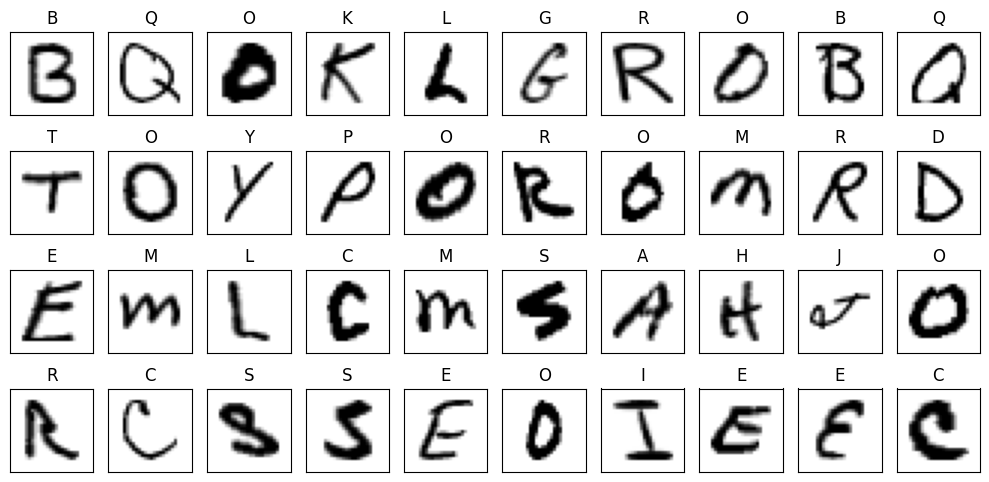

In [ ]:
#@title Visualize Dataset of Images
X = df.iloc[:,1:].to_numpy()/255
y = df.iloc[:,0].to_numpy()
rows, cols = 4, 10
fig, ax = plt.subplots(rows, cols, sharex='col', sharey='row',
subplot_kw=dict(xticks=[], yticks=[]),
figsize=(10,5))
for row in range(rows):
  for col in range(cols):
    n = np.random.randint(372449)
    # show random samples
    im = ax[row, col].imshow(X[n].reshape((28,28)), cmap=plt.cm.gray_r)
    ax[row, col].set_title(chr(y[n]+65))

plt.tight_layout()
plt.show()

In [ ]:
#@title Sampled from the dataset and export
# Get the unique labels (letters)
unique_labels = df.iloc[:, 0].unique()

# Initialize an empty DataFrame to store the sampled data
df2 = pd.DataFrame(columns=df.columns)

# Loop through each unique label and sample 100 rows
for idx in range(0,26):
    label_df = df[df.iloc[:, 0] == idx]
    sampled_label_df = label_df.sample(n=100, random_state=42)
    df2 = pd.concat([df2, sampled_label_df], ignore_index=True)

# Verify the resulting DataFrame
print("\nSampled DataFrame Info:")
print(df2.head())
print(df2.info())
print(df2.iloc[:, 0].value_counts())
print(df2.shape)


Sampled DataFrame Info:
   0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9  ... 0.639 0.640 0.641 0.642 0.643  \
0  0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
1  0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
2  0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
3  0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
4  0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   

  0.644 0.645 0.646 0.647 0.648  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     0     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 785 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Columns: 785 entries, 0 to 0.648
dtypes: object(785)
memory usage: 15.6+ MB
None
0
0     100
1     100
24    100
23    100
22    100
21    100
20    100
19    100
18    100
17    100
16    100
15   

In [ ]:
#@title Export the sampled DataFrame to a CSV file
df2.to_csv('sampled_dataset.csv', index=False)
print("Sampled dataset exported to 'sampled_dataset.csv'.")

Sampled dataset exported to 'sampled_dataset.csv'.


In [ ]:
#@title Read the New imported csv file

#Code if from google collab
# myfile2 = "/content/drive/MyDrive/Colab Notebooks/DS 397/Machine Problem 2/sampled_dataset.csv"
# df3 = pd.read_csv(myfile2)

#Code for Local Machine
df3 = pd.read_csv("sampled_dataset.csv")
# print(df3.shape)

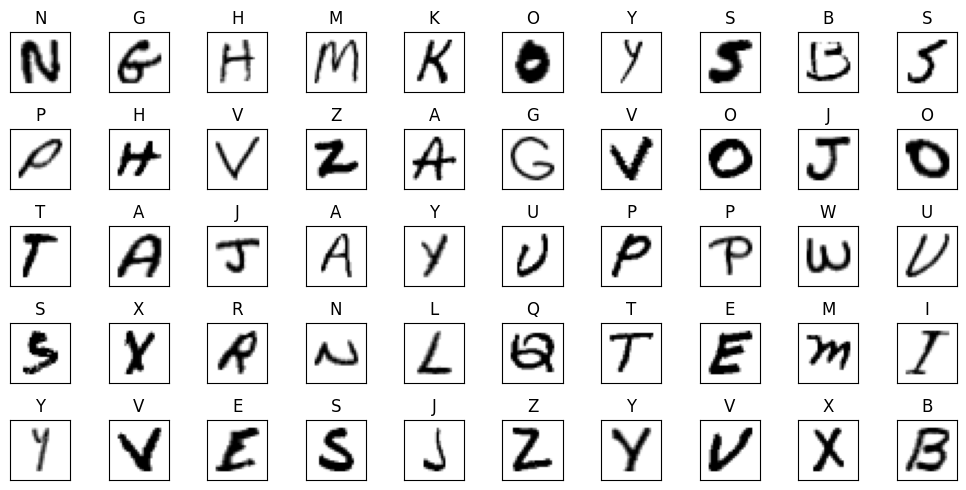

In [ ]:
#@title Visualize Dataset of Samples Images
X_sampled = df3.iloc[:,1:].to_numpy()/255
y_sampled = df3.iloc[:,0].to_numpy()
rows, cols = 5, 10
fig, ax = plt.subplots(rows, cols, sharex='col', sharey='row',
subplot_kw=dict(xticks=[], yticks=[]),
figsize=(10,5))
for row in range(rows):
  for col in range(cols):
    n = np.random.randint(df3.shape[0])
    # show random samples
    im = ax[row, col].imshow(X_sampled[n].reshape((28,28)), cmap=plt.cm.gray_r)
    ax[row, col].set_title(chr(y_sampled[n]+65))

plt.tight_layout()
plt.show()

# t-Distributed Stochastic Neighbor Embedding

In [ ]:
#@title TSNE from SKlearn
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_sampled)

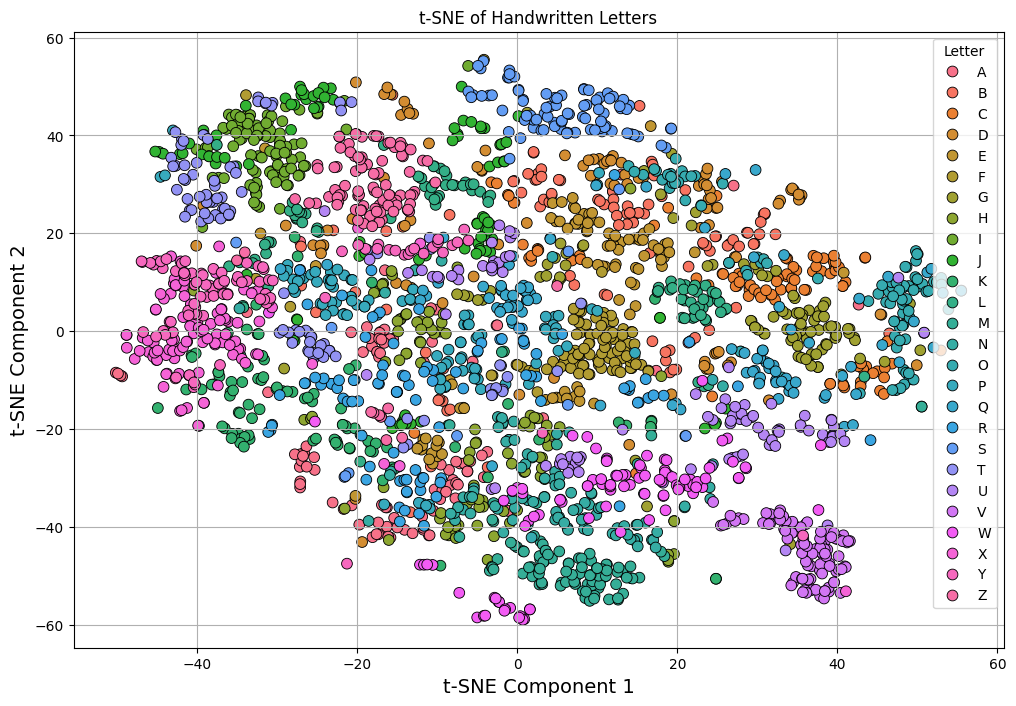

In [ ]:
#@title Visualize the 2D latent space via TSNE
target_names = {i: chr(65 + i) for i in range(26)}
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE 1', 'TSNE 2'])
tsne_df['Letter'] = pd.Categorical(y_sampled).map(lambda x: target_names[x])
plt.figure(figsize=(12, 8))
sns.scatterplot(data=tsne_df, x="TSNE 1", y="TSNE 2", hue="Letter", s=60, edgecolor='k')
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)
plt.title("t-SNE of Handwritten Letters")
plt.grid(True)
plt.show()


# Density-Based Spatial Clustering of Applications with Noise

In [ ]:
#@ Filtered out the needed initial
initial = "J"
X_filtered = tsne_df[tsne_df['Letter'] == initial]
j_data = tsne_df[tsne_df['Letter'] == initial].drop("Letter", axis=1).to_numpy()

In [ ]:
# db = DBSCAN(eps=2, min_samples=5).fit(X_filtered)
db = DBSCAN(eps=4, min_samples=8)
X_filtered.loc[:, 'Cluster'] = db.fit_predict(X_filtered[['TSNE 1', 'TSNE 2']])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print(f"Number of Clusters: {n_clusters_}")
print(f"Number of Noisy data points: {n_noise_}")

Number of Clusters: 5
Number of Noisy data points: 20


<ipython-input-118-c323a20a25be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_filtered.loc[:, 'Cluster'] = db.fit_predict(X_filtered[['TSNE 1', 'TSNE 2']])


In [ ]:
# label_names = {f"Cluster {i}" for i in range(len(unique_labels)-1)}

# legend_labels = ['Noise' if label == -1 else f"Cluster {i}" for i in range(len(unique_labels)-1)]
legend_labels = ['Noise' if label == -1 else str(label) for label in unique_labels]

legend_labels

['0', '1', '2', '3', '4', 'Noise']

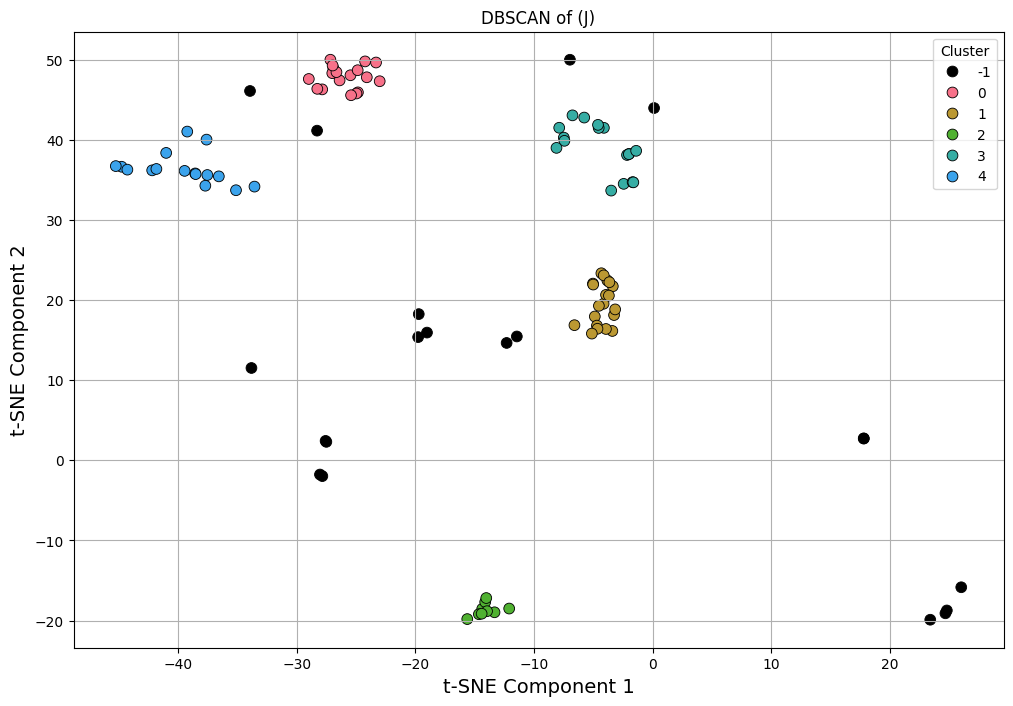

In [ ]:
#@title Visualize DBSCAN Clusters
# Color scatter plot based on cluster labels
unique_labels = set(labels)
# Generate a list of colors using a colormap with enough distinct colors
colors = sns.color_palette('husl', len(unique_labels))

# Assign black color to cluster label '-1'
color_map = {-1: 'black'}
# Assign different colors to other cluster labels
for i, label in enumerate(unique_labels):
    if label != -1:
        color_map[label] = colors[i]

# Create scatter plot with coloring
plt.figure(figsize=(12, 8))
sns.scatterplot(data=X_filtered, x="TSNE 1", y="TSNE 2", s=60, hue="Cluster", palette=color_map, edgecolor='k')
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)
plt.title(f"DBSCAN of ({initial})")
plt.grid(True)
plt.show()

Displaying a few outlier images:


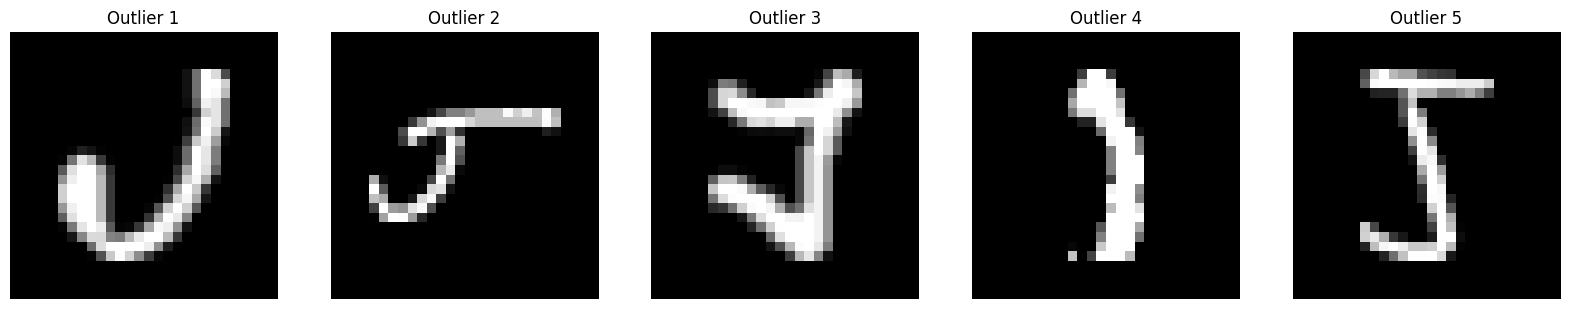

In [ ]:
#@title Outlier Images Plot
outliers = X_filtered[X_filtered['Cluster'] == -1]
num_outliers = len(outliers)
if num_outliers > 0:
    print(f"Displaying a few outlier images:")
    fig, axes = plt.subplots(1, 5, figsize=(20, 8))  # Adjust if you want more images in a single row
    for i, (idx, row) in enumerate(outliers.iterrows()):
        if i >= 5:  # Display a maximum of 10 images
            break
        image_index = row.name  # Assuming the DataFrame index corresponds to the position in X_sampled
        image = X_sampled[image_index].reshape(28, 28)  # Reshape if images are 28x28 pixels
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"Outlier {i+1}")
        axes[i].axis('off')
    plt.show()
else:
    print("No outliers found.")

DBSCAN identifies outliers based on the density of data points. If all outliers detected by DBSCAN on the letter "J" data still belong to the letter "J", it indicates that some instances of the letter "J" are in less dense regions compared to others. This is expected behavior and reflects natural variations in handwriting, noise in the data, or differences in how individual "J"s are written.